<a href="https://colab.research.google.com/github/Leina400/Academic-Project/blob/main/Statistical_Learning/Forecasting_Msc_year1/Projet_Stat_leina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=darkcyan>  Projet - MU4MA076 - Base de l'apprentissage statistique (Master 1) </font>



---



Dans ce projet, nous nous intéressons à un problème de régression à partir des données proposées dans ce [jeu de données](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv).

L’objectif principal est de prédire la consommation d’énergie des appareils électroménagers (mesurée en Wh) à intervalles réguliers de 10 minutes, sur une période d’environ 4,5 mois. Cette consommation est influencée par plusieurs variables explicatives, également enregistrées toutes les dix minutes, telles que la température et l’humidité intérieure et extérieure, les conditions météorologiques, ou encore les réglages de l'appartement intelligent.

Ce jeu de données est issu de la base UCI Machine Learning Repository, et des informations complémentaires sont disponibles ici : [Appliances Energy Prediction Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

Pour en savoir plus sur le contexte de collecte des données et sur leur utilisation dans la littérature, on peut consulter l'article suivant : [Data-driven prediction models of energy use of appliances in a low-energy house](https://paperswithcode.com/paper/data-driven-prediction-models-of-energy-use)



### <font color=darkcyan>  Modules et bibliothèques de base à importer  </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

In [ ]:
from sklearn import linear_model

## <font color=darkcyan>  Analyse descriptive  </font>


Conformément à l’article de référence, ce jeu de données concerne **la consommation énergétique d’une maison située en Belgique**. Plus précisément, il s'agit de **la consommation des appareils électroménagers**, enregistrée toutes les dix minutes, en parallèle avec un ensemble riche de **variables environnementales**, aussi bien **intérieures** (température, humidité dans différentes pièces) qu’**extérieures** (conditions météorologiques, visibilité, pression, etc.).

L’objectif de cette section est d’effectuer une **analyse exploratoire des données** afin de :

- **Comprendre la structure** du jeu de données (nombre d’observations, types de variables, valeurs manquantes, etc.) ;
- Identifier les **tendances globales** (évolution temporelle, saisonnalité, etc.) ;
- Repérer d’éventuelles **corrélations** ou **relations significatives** entre les variables ;
- **Sélectionner les variables pertinentes** pour la modélisation, ou au contraire en **éliminer certaines** jugées redondantes ou peu informatives.

Cette étape est cruciale pour guider le choix des modèles, améliorer les performances de la prédiction, et surtout garantir une bonne **interprétabilité** des résultats obtenus.


### <font color=darkcyan>  Présentation des variables du jeu de données  </font>

| Variable      | Description |
|--------------|-------------|
| **date time** | Date et heure  |
| **Appliances** | Consommation d'énergie des appareils électroménagers en Wh |
| **lights** | Consommation d'énergie des luminaires en Wh |
| **T1** | Température dans la cuisine (°C) |
| **RH_1** | Humidité dans la cuisine (%) |
| **T2** | Température dans le salon (°C) |
| **RH_2** | Humidité dans le salon (%) |
| **T3** | Température dans la buanderie (°C) |
| **RH_3** | Humidité dans la buanderie (%) |
| **T4** | Température dans le bureau (°C) |
| **RH_4** | Humidité dans le bureau (%) |
| **T5** | Température dans la salle de bain (°C) |
| **RH_5** | Humidité dans la salle de bain (%) |
| **T6** | Température à l'extérieur du bâtiment (côté nord) (°C) |
| **RH_6** | Humidité à l'extérieur du bâtiment (côté nord) (%) |
| **T7** | Température dans la salle de repassage (°C) |
| **RH_7** | Humidité dans la salle de repassage (%) |
| **T8** | Température dans la chambre de l'adolescent 2 (°C) |
| **RH_8** | Humidité dans la chambre de l'adolescent 2 (%) |
| **T9** | Température dans la chambre des parents (°C) |
| **RH_9** | Humidité dans la chambre des parents (%) |
| **To** | Température extérieure (station météo de Chievres) (°C) |
| **Pressure** | Pression atmosphérique (station météo de Chievres) (mm Hg) |
| **RH_out** | Humidité extérieure (station météo de Chievres) (%) |
| **Wind speed** | Vitesse du vent (station météo de Chievres) (m/s) |
| **Visibility** | Visibilité (station météo de Chievres) (km) |
| **Tdewpoint** | Point de rosée (station météo de Chievres) (°C) |
| **rv1** | Variable aléatoire 1 |
| **rv2** | Variable aléatoire 2 |



In [ ]:
# importer les données

import pandas as pd
df = pd.read_csv("energydata_complete.csv")

In [ ]:
# les premières observation et dernières observation
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
print("taille du jeu de données : ", df.shape)

taille du jeu de données :  (19735, 29)


In [ ]:
# affiche les infos du jeu de données (les entrées (colonnes) etc )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# notre cible -> target (variable à expliquer) -> la colonne "Appliances"
df.iloc[:, 1]


,Appliances
0,60
1,60
2,50
3,50
4,60
...,...
19730,100
19731,90
19732,270
19733,420


In [ ]:
# variable explicative (toutes les autres entrées) -> features

df.iloc[:, 2:]

# on eleve la colonne des dates et la variable cible

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
# Affiche les corrélations entre ntore cible et toutes les autres variables explicatives

correlations = df.corr(numeric_only=True)["Appliances"].sort_values(ascending=False)
correlations

,Appliances
Appliances,1.000000
lights,0.197278
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281


**Remarque** : D'après la méthode corr(), on observe de faible corrélation linéaire avec la cible. Il se pourrait que les variables soient peu informative linéairement ? Les variables pourraient ne pas être liées linéairement




### <font color=darkcyan>   Visualisation des donneés sous forme de graphiques </font>

Dans cette section, nous visualisons les variable sous forme de graphique et l’évolution des principales variables (notamment la **consommation des appareils**) en fonction du **temps**. L’objectif est de détecter d’éventuels **motifs temporels** ou **patterns récurrents**, tels que :

- Des **variations journalières** ou **hebdomadaires** ;
- Une consommation différente **le week-end** par rapport aux jours de semaine ;
- Des pics de consommation **à certains moments de la journée**.

Ces visualisations permettent de mieux **comprendre la dynamique temporelle** des données et d’orienter les choix futurs en matière de **modélisation**, notamment en intégrant des **variables temporelles dérivées** (heure, jour de la semaine, etc.) ou en envisageant des **modèles séquentiels** si nécessaire.

In [ ]:
y = df.iloc[:, 1]       # on recupere les données de "Apliances"
temps = df.iloc[:,0]    # on recupere le temps (date)


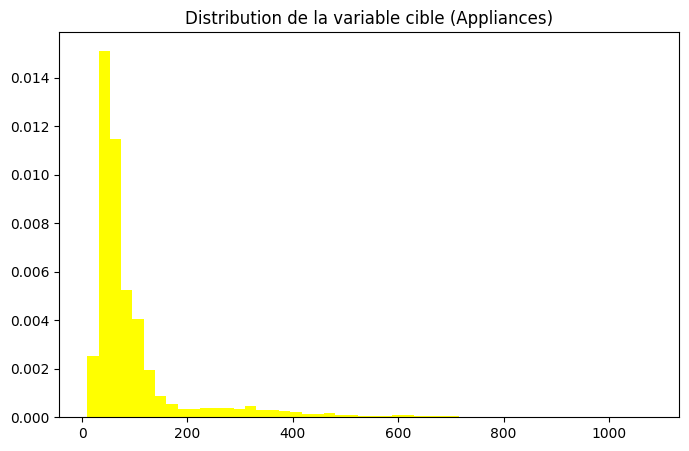

In [ ]:
# Vérifier la distribution de la variable cible
plt.figure(figsize=(8, 5))
plt.hist(y, bins=50, density = True, color = "yellow")
plt.title("Distribution de la variable cible (Appliances)")
plt.show()

Text(0.5, 1.0, 'Boite à moustache')

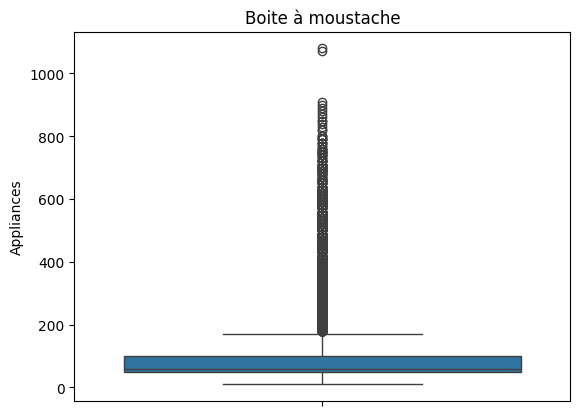

In [ ]:
import seaborn as sns
sns.boxplot(df["Appliances"])
plt.title("Boite à moustache")

**Remarque** : \
 graphique n°1 montre la distribution de la consommation énergétique des appareils électroménagers, mesurée en Wh.

On observe une **distribution fortement asymétrique à droite** : la grande majorité des valeurs sont **faibles**, concentrées entre 0 et 200 Wh, tandis que **quelques observations** plus rares présentent des **valeurs beaucoup plus élevées**, allant jusqu’à plus de 1000 Wh. Notre cible semble présenter des outliers. C'est pourquoi nous prendrons en considération la `huberloss` dans la dernière partie pour comparer avec le `MSE`\
Le graphique n°2 représente une boite à moustache et nous confirme la présence d'outliers

###  <font color=darkcyan>  Analyse temporelle : jours de la semaine et week-ends


Dans le bloc ci-dessous, nous procédons à une **manipulation des données temporelles** afin d’extraire et afficher des informations telles que **le jour de la semaine** ou encore si une observation a été prise **le week-end**.

L’objectif est d’identifier d’éventuelles **habitudes de consommation** propres aux différents jours. En particulier :
- Vérifier si la consommation des appareils électroménagers varie selon les **jours ouvrés** ou le **week-end** ;
- Détecter des **comportements répétitifs** (par exemple, pics de consommation les lundis matin ou baisse systématique le dimanche) ;
- Mieux comprendre les **patterns d’usage** de la maison pour guider la modélisation.

On a par ailleurs utiliser les sources externes suivantes :\
[panda reférences 1](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)\
[panda référence 2](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html)\
[Limiter le nombre de tick](https://garba.org/posts/2022/matplotlib/)


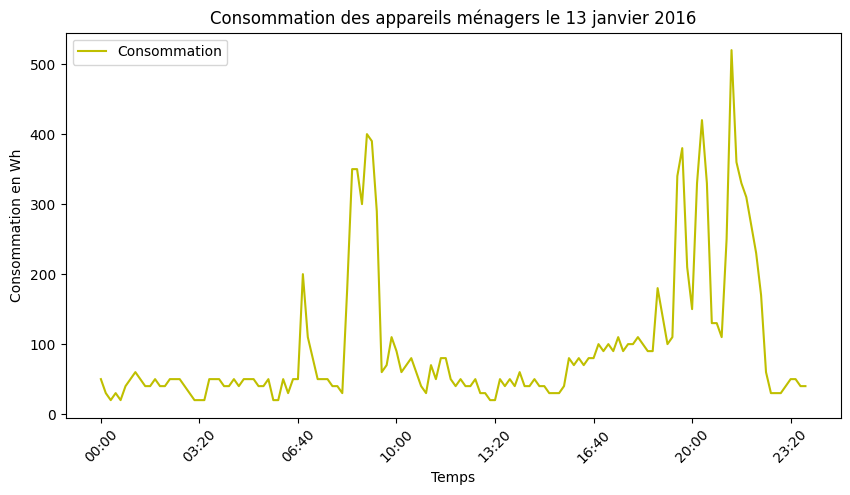

In [ ]:
# on convertit la colonne des date en datetime que l'on pourra manipuler
df['date'] = pd.to_datetime(df['date'])

#.dt sert à manipuler les datetime -> ici on extrait un jour dans l'année
selected_day = df[df['date'].dt.date == pd.to_datetime("2016-01-13").date()]


# on extrait les heures pour l'affichage
selected_day = selected_day.copy()
selected_day['heure'] = selected_day['date'].dt.strftime('%H:%M')

plt.figure(figsize=(10, 5))
# on met la consommation en fonction des heures de la journée
# convertir en array pour utiliser plot sinon ce sont des dataframe
plt.plot(np.array(selected_day['heure']), np.array(selected_day['Appliances']), c='y', label="Consommation")
plt.xlabel("Temps")
plt.ylabel("Consommation en Wh")
plt.title("Consommation des appareils ménagers le 13 janvier 2016")

# rotation des ticks
plt.xticks(rotation=45)

# pour limiter à 10 le nombre de tick (lisbilité)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.legend()
plt.show()

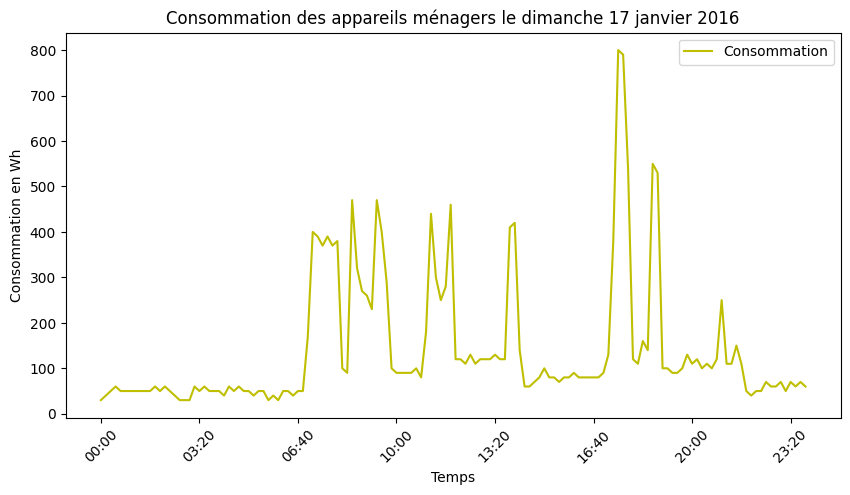

In [ ]:
# on convertit la colonne des date en datetime que l'on pourra manipuler
df['date'] = pd.to_datetime(df['date'])

#.dt sert à manipuler les datetime -> ici on extrait un jour dans l'année
selected_day = df[df['date'].dt.date == pd.to_datetime("2016-01-17").date()]


# on extrait les heures pour l'affichage
selected_day = selected_day.copy()
selected_day['heure'] = selected_day['date'].dt.strftime('%H:%M')

plt.figure(figsize=(10, 5))
# on met la consommation en fonction des heures de la journée
# convertir en array pour utiliser plot sinon ce sont des dataframe
plt.plot(np.array(selected_day['heure']), np.array(selected_day['Appliances']), c='y', label="Consommation")
plt.xlabel("Temps")
plt.ylabel("Consommation en Wh")
plt.title("Consommation des appareils ménagers le dimanche 17 janvier 2016")

# rotation des ticks
plt.xticks(rotation=45)

# pour limiter à 10 le nombre de tick (lisbilité)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.legend()
plt.show()

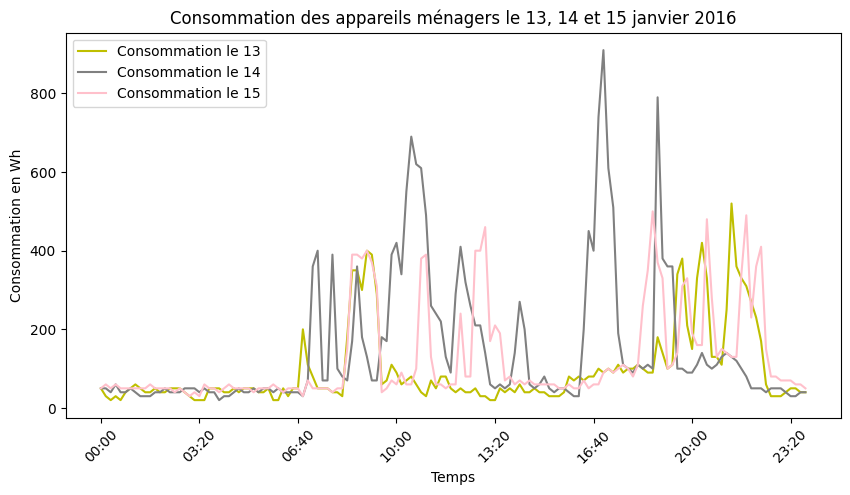

In [ ]:
# on convertit la colonne des date en datetime que l'on pourra manipuler
df['date'] = pd.to_datetime(df['date'])

#.dt sert à manipuler les datetime -> ici on extrait un jour dans l'année
selected_day1 = df[df['date'].dt.date == pd.to_datetime("2016-01-13").date()]
selected_day2 = df[df['date'].dt.date == pd.to_datetime("2016-01-14").date()]
selected_day3 = df[df['date'].dt.date == pd.to_datetime("2016-01-15").date()]

# on extrait les heures pour l'affichage
selected_day1 = selected_day1.copy()
selected_day1['heure'] = selected_day1['date'].dt.strftime('%H:%M')
selected_day2 = selected_day2.copy()
selected_day2['heure'] = selected_day2['date'].dt.strftime('%H:%M')
selected_day3 = selected_day3.copy()
selected_day3['heure'] = selected_day3['date'].dt.strftime('%H:%M')


plt.figure(figsize=(10, 5))
# on met la consommation en fonction des heures de la journée
plt.plot(np.array(selected_day1['heure']), np.array(selected_day1['Appliances']), c='y', label="Consommation le 13")
plt.plot(np.array(selected_day2['heure']), np.array(selected_day2['Appliances']), c='grey', label="Consommation le 14")
plt.plot(np.array(selected_day3['heure']), np.array(selected_day3['Appliances']), c='pink', label="Consommation le 15")
plt.xlabel("Temps")
plt.ylabel("Consommation en Wh")
plt.title("Consommation des appareils ménagers le 13, 14 et 15 janvier 2016")

# rotation des ticks
plt.xticks(rotation=45)

# pour limiter à 10 le nombre de tick (lisbilité)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.legend()
plt.show()

Le graphique ci-dessus présente l’évolution de la consommation électrique des appareils ménagers les **13, 14 et 15 janvier 2016**, qui correspondent à des **jours de semaine (mercredi, jeudi et vendredi)**.

On observe des **pics de consommation marqués le matin et en fin d'après-midi**, ce qui reflète probablement les **moments d’occupation intense du logement** (préparation du matin, retour du travail, utilisation du chauffage ou de la cuisine). Ces motifs sont relativement cohérents d’un jour à l’autre, bien que le **14 janvier présente une activité particulièrement élevée**, notamment en soirée.

Ce type de visualisation permet de **repérer des habitudes journalières régulières**, utiles pour la modélisation temporelle ou l'extraction de variables dérivées.

## <font color=darkcyan>  Séparation des données, preprocessing et séléction </font>

Dans cette section, nous allons procéder à la **séparation du jeu de données** en deux ensembles : un **jeu d’entraînement** et un **jeu de test**. Cette étape est essentielle pour évaluer de manière rigoureuse la performance de nos modèles prédictifs.

Nous appliquerons ensuite une **standardisation** des variables. Cette étape est cruciale car nous utiliserons des **méthodes de régression pénalisées** telles que **Ridge** et **Lasso**, qui sont sensibles à l’échelle des variables. En effet, si certaines variables présentent des valeurs numériques beaucoup plus grandes que d’autres, elles auront une influence disproportionnée sur le terme de régularisation.  C'est encore plus important dans notre cas étant donné que notre cible comporte des outliers.
La **standardisation (centrage-réduction)** permet donc de garantir que chaque variable contribue de manière équitable à la régularisation, en ramenant toutes les variables à une même échelle.

À la manière de l’article de référence, nous choisissons de **conserver l’information temporelle** pour enrichir notre modèle. Pour ce faire, nous ajoutons plusieurs **features temporels** afin de capturer les effets potentiels du **rythme quotidien** ou **hebdomadaire** sur la consommation énergétique.

Les variables ajoutées sont les suivantes :

- **`Week_end`** : indicateur binaire qui vaut `0` si l'observation a lieu pendant un **week-end**, et `1` sinon. Cette variable permet de tester si le **comportement énergétique change durant le week-end**.
  
- **`Day_of_week`** : variable entière encodant le **jour de la semaine** (`0` = lundi, `1` = mardi, ..., `6` = dimanche). Elle permet d’analyser d’éventuelles **variations systématiques selon le jour**.

- **`NSM` (Number of Seconds of the Minute)** : cette variable représente le **nombre de secondes écoulées depuis minuit**.
  Elle constitue une **représentation temporelle continue** de l’heure de la journée, utile pour modéliser des **effets périodiques horaires**.

Nous avons observé que l’ajout de ces variables temporelles permettait une **amélioration du score MSE**.

* Ressources utilisés pour la suite :   \
[DayOfWeek pandas ](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html)\
[Date Time Pandas](https://medium.com/france-school-of-ai/travailler-facilement-avec-les-dates-sur-pandas-14b14b2ea51)

In [ ]:
# On convertit la colonne 'date' en format datetime -> permet de les manipuler en utilisant dt.
df['date'] = pd.to_datetime(df['date'])

# ajout des variables de temps

# dayofweek est une methode disponible par panda.series.dt qui extrait les jour de la semaine de la manière suivante :
# 0 : lundi, 1: mardi, ---- 6 : dimanche
df["day_of_week"] = df["date"].dt.dayofweek

# si samedi(5) ou dimanche(6) -> 1 sinon 0
df["weekend"] = df["day_of_week"].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1})

# Rq : map ou lambda fonction c'est pareil

# On construit l'etat des jours (utilsiation d'une lambda-fonction)
df["monday"] = df["day_of_week"].apply(lambda x: 1 if x == 0 else 0)
df["tuesday"] = df["day_of_week"].apply(lambda x: 1 if x == 1 else 0)
df["wednesday"] = df["day_of_week"].apply(lambda x: 1 if x == 2 else 0)
df["thursday"] = df["day_of_week"].apply(lambda x: 1 if x == 3 else 0)
df["friday"] = df["day_of_week"].apply(lambda x: 1 if x == 4 else 0)

# On extrait les heures de la journée
df["hour"] = df["date"].dt.hour

# On construit NSM donc le nombre de secondes depuis minuit : heure*3600+minute*60+second
df["NSM"] = df["date"].dt.hour * 3600 + df["date"].dt.minute * 60

# Supprimer la colonne 'date'
df.drop(columns=["date"], inplace=True)
df.drop(columns=["hour"], inplace = True) # nous a servi pour cosntruire NSM mais n'est plus utile car redondant sinon

In [ ]:
print(df[["day_of_week", "weekend", "monday", "tuesday", "wednesday", "thursday", "friday"]].head())

   day_of_week  weekend  monday  tuesday  wednesday  thursday  friday
0            0        0       1        0          0         0       0
1            0        0       1        0          0         0       0
2            0        0       1        0          0         0       0
3            0        0       1        0          0         0       0
4            0        0       1        0          0         0       0


In [ ]:
df[["day_of_week", "weekend", "monday", "tuesday", "wednesday", "thursday", "friday"]]

,day_of_week,weekend,monday,tuesday,wednesday,thursday,friday
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
19730,4,0,0,0,0,0,1
19731,4,0,0,0,0,0,1
19732,4,0,0,0,0,0,1
19733,4,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,day_of_week,weekend,monday,tuesday,wednesday,thursday,friday,NSM
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,13.275433,13.275433,0,0,1,0,0,0,0,61200
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.606195,18.606195,0,0,1,0,0,0,0,61800
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,28.642668,28.642668,0,0,1,0,0,0,0,62400
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.410389,45.410389,0,0,1,0,0,0,0,63000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,10.084097,10.084097,0,0,1,0,0,0,0,63600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,43.096812,43.096812,4,0,0,0,0,0,1,62400
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,49.282940,49.282940,4,0,0,0,0,0,1,63000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,29.199117,29.199117,4,0,0,0,0,0,1,63600
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,6.322784,6.322784,4,0,0,0,0,0,1,64200


**Remarque** :  
Nous nous sommes interrogés sur la **redondance potentielle** entre les variables `Day_of_week` et la variable binaire `Week_end`. En effet, ces deux variables dérivent de la même information temporelle (le jour de la semaine), et on aurait pu penser que l’une rendait l’autre superflue.

Cependant, après expérimentation, nous avons constaté que **supprimer `Day_of_week`** entraînait une légère **dégradation des performances du modèle**, notamment en termes de MSE. Cela peut suggérer que la granularité offerte par `Day_of_week` apporte **des informations supplémentaires utiles**, que `Week_end` (binaire) ne capture pas à elle seule.


In [ ]:
# séparation en jeu de test et jeu de données avant standardisation :

from sklearn.model_selection import train_test_split
# on a déjà enlevé les dates avec drop.columns()


X = df.iloc[:, 1:]  # on lui enleve la target
y = df["Appliances"] # ou df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)
# On utilise 80% des données pour l'apprentissage et 20% pour le test

In [ ]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,day_of_week,weekend,monday,tuesday,wednesday,thursday,friday,NSM
2133,0,19.890000,45.50,19.200000,45.090000,20.390000,44.290000,19.10,46.700000,17.511111,...,39.240863,39.240863,1,0,0,1,0,0,0,45000
19730,0,25.566667,46.56,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,23.200000,...,43.096812,43.096812,4,0,0,0,0,0,1,62400
3288,0,22.500000,44.43,21.533333,42.590000,21.963333,44.555000,22.00,40.466667,19.100000,...,42.054659,42.054659,2,0,0,0,1,0,0,46800
7730,0,19.790000,38.06,17.200000,40.933333,20.600000,37.163333,18.39,37.000000,18.290000,...,12.615865,12.615865,5,1,0,0,0,0,0,33600
8852,0,20.600000,35.29,17.100000,39.790000,20.290000,37.000000,19.50,34.500000,18.200000,...,10.897926,10.897926,6,1,0,0,0,0,0,15600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,21.760000,40.90,19.390000,43.090000,23.000000,39.000000,21.50,39.790000,20.100000,...,45.513197,45.513197,2,0,0,0,1,0,0,6000
11964,0,22.390000,43.70,22.000000,42.066667,22.700000,41.230000,21.29,44.120000,19.700000,...,34.934752,34.934752,6,1,0,0,0,0,0,68400
5390,0,20.290000,35.70,18.200000,37.590000,20.100000,37.590000,18.20,35.290000,18.500000,...,19.071358,19.071358,3,0,0,0,0,1,0,12000
860,0,21.790000,35.56,20.434000,35.116000,21.200000,36.900000,21.10,35.663333,18.050000,...,1.050592,1.050592,6,1,0,0,0,0,0,58800


In [ ]:
y_test

,Appliances
8980,40
2754,90
9132,50
14359,50
8875,70
...,...
9815,80
9925,100
14088,60
17356,70


In [ ]:
# standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((15788, 35), (3947, 35), (3947,), (15788,))

## <font color=darkcyan>  ACP </font>

## <font color=darkcyan>  Régression Ridge </font>

Dans cette section, nous appliquons une **régression Ridge**, une méthode de régression linéaire pénalisée qui ajoute une **régularisation L2** au modèle. Cette pénalisation permet de **réduire le sur-apprentissage** en contraignant les coefficients à rester petits, en particulier lorsque les variables sont corrélées ou nombreuses.

Nous avons utilisé **`GridSearchCV`** pour effectuer une **recherche sur grille des hyperparamètres**, en particulier le paramètre de régularisation `alpha`. Cela nous permet de sélectionner automatiquement la **valeur optimale** de `alpha` qui minimise l’erreur (par validation croisée), et donc d'obtenir **le meilleur compromis entre biais et variance**.
.


$$
\mathcal{L}_{\text{Ridge}}(\mathbf{B}) = \| \mathbf{Y} - X\mathbf{B} \|_2^2 + \alpha \| \mathbf{B} \|_2^2
$$

*Dans la suite, on prend comme convention que alpha est la pénalisation et non lambda comme dans le cours. Ca permet de s'alligner avec les modèles de keras, scikit ...*

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_train = []
mse_test = []
#coeff = np.zeros()
reg = linear_model.Ridge()

Alphas = np.logspace(-4,2,num = 50)

for a in Alphas:
  #print("a : ", a)
  reg.set_params(alpha = a)
  reg.fit(X_train, y_train)
  y_hat_train = reg.predict(X_train)
  y_hat_test = reg.predict(X_test)
  mse_train.append(mean_squared_error(y_hat_train, y_train.values))
  mse_test.append(mean_squared_error(y_hat_test, y_test.values))

In [ ]:
np.mean(mse_train)

NameError: name 'mse_train' is not defined

In [ ]:
np.mean(mse_test)

np.float64(8252.288276408746)

**Remarque** :

Le **MSE moyen** obtenu sur le jeu de test est d’environ **8252.76 Wh²**. Ce score donne une première indication sur la **qualité de la prédiction de la régression Ridge** pour différents niveaux de régularisation (`alpha`).

Le MSE semble élever mais on peut observer comment le MSE varie en fonction de `alpha` pour détecter un **compromis optimal entre biais et variance**.

Les graphiques ci-dessus permettent de visualiser la **capacité prédictive** du modèle Ridge, aussi bien sur le **jeu d'entraînement** que sur le **jeu de test**.

Text(0.5, 1.0, 'MSE de test en fonction des Alphas')

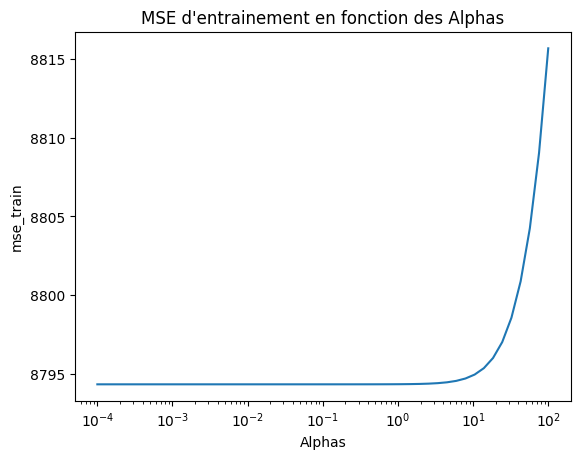

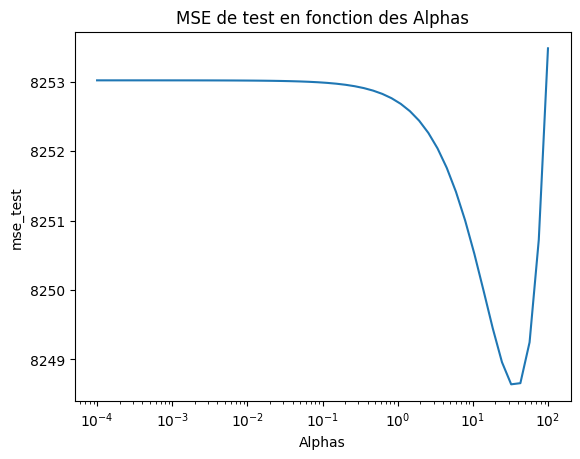

In [ ]:
plt.xscale('log')
plt.plot(Alphas, mse_train)
plt.xlabel("Alphas")
plt.ylabel("mse_train")
plt.title("MSE d'entrainement en fonction des Alphas")

plt.figure()
plt.plot(Alphas, mse_test)
plt.xscale('log')
plt.xlabel("Alphas")
plt.ylabel("mse_test")
plt.title("MSE de test en fonction des Alphas")

**Remarque**\
Le graphique ci-dessus illustre la **variation du MSE** en fonction des valeurs de l'hyperparamètre `alpha` dans notre modèle Ridge.

  - Pour les très faibles valeurs de `alpha` (quasi-absence de régularisation), le modèle est plus flexible, mais le gain en test est négligeable.
  - Un **minimum clair du MSE test** est atteint pour une valeur optimale de `alpha` (aux alentours de 30–50), indiquant le **meilleur compromis entre sous- et sur-ajustement**.
  - Au-delà de ce point, une trop forte régularisation dégrade à la fois le MSE entraînement et test, car le modèle devient trop rigide.


Text(0.5, 1.0, 'Prediction sur le jeu de test')

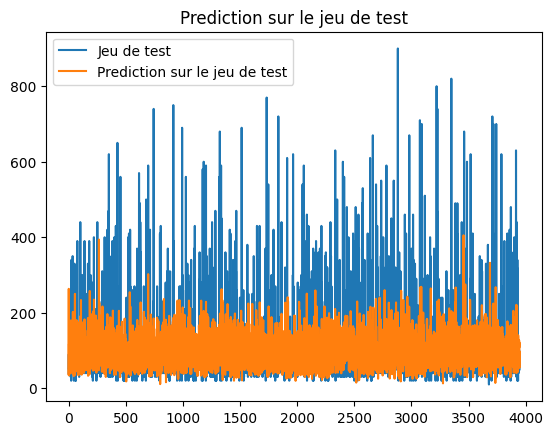

In [ ]:
plt.plot(np.array(y_test), label = "Jeu de test")
plt.plot(y_hat_test, label = "Prediction sur le jeu de test")
plt.legend()
plt.title("Prediction sur le jeu de test")

Text(0.5, 1.0, "Prediction sur le jeu d'entrainement")

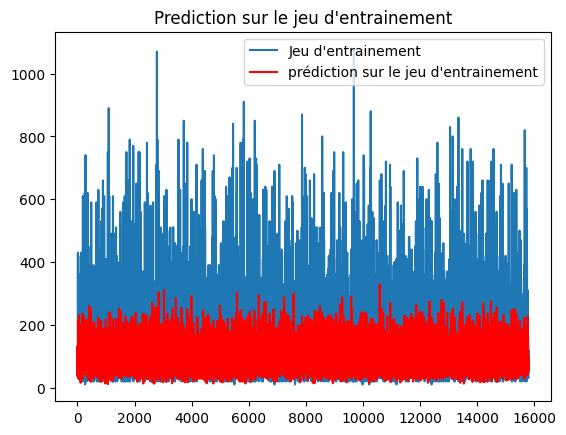

In [ ]:
plt.plot(y_train.values, label = "Jeu d'entrainement")
plt.plot(y_hat_train, 'red',label = "prédiction sur le jeu d'entrainement")
plt.legend()
plt.title("Prediction sur le jeu d'entrainement")

**Remarque**
- On constate que sur les deux ensembles (test et train), les **prédictions sont globalement sous-évaluées** par rapport aux vraies valeurs. Cela peut s’expliquer par la nature **asymétrique** et **bruitée** de la variable cible, mais aussi par les **limitations d’un modèle linéaire**, qui peine à capturer des pics de consommation élevés.


Regardons si prendre les meilleurs hyperparmètre nous donne un meilleur MSE :

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# On définiti la grille des hyperparamètres alpha
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 50, 10, 100, 1000, 1500]}

# Validation croisée avec GridSearchCV
reg_ridge = linear_model.Ridge()
grid_search = GridSearchCV(reg_ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Meilleur alpha trouvé
best_alpha = grid_search.best_params_["alpha"]
best_alpha

1

In [ ]:
reg = linear_model.Ridge(alpha = best_alpha)
reg.fit(X_train, y_train)
y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)
mse1 = mean_squared_error(y_hat_train, y_train.values)
mse2 = mean_squared_error(y_hat_test, y_test.values)

print("Mse jeu d'entrainement : ", mse1, "\nMse jeu de test : ", mse2)

Mse jeu d'entrainement :  8794.334253972438 
Mse jeu de test :  8252.710193820636


**Remarque** : Sans l'ajout de fatures temporelles, les mse etaient d'environ 9500

**Conclusion**\
Les performances obtenues avec le modèle de **régression Ridge** restent **modestes**. Même sur le jeu d’entraînement, le modèle ne parvient pas à bien "apprendre" : les prédictions sont globalement biaisées et sous-évaluent systématiquement la consommation réelle.

Plusieurs hypothèses peuvent expliquer ces résultats :
- La **distribution très asymétrique** de la variable cible rend difficile l’ajustement avec un modèle linéaire.
- Les **variables explicatives** disponibles ne semblent **pas suffisamment informatives**, ou leurs relations avec la cible sont peut-être **non linéaires**.
- Il est possible que les **relations complexes** entre les variables ne soient pas bien capturées par une approche linéaire, même régularisée.

Ces constats suggèrent qu’il pourrait être **pertinent de tester des modèles non linéaires** afin de mieux capturer les variations de la consommation.

## <font color=darkcyan>  Régression Lasso </font>

Dans cette section, nous appliquons une **régression Lasso**, une autre forme de **régression linéaire pénalisée**, mais cette fois-ci avec une **régularisation L1**.

Contrairement à la régression Ridge (L2), la pénalisation L1 de Lasso a la particularité de pouvoir **annuler certains coefficients**, ce qui mène à une **sélection automatique de variables**. Cela peut être particulièrement utile lorsque certaines features sont peu informatives ou redondantes.

$$
\mathcal{L}_{\text{Lasso}}(\mathbf{B}) = \| \mathbf{Y} - X\mathbf{B} \|_2^2 + \alpha \| \mathbf{B} \|_1
$$

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [ ]:
Alphas = np.logspace(-10, 2, 100)

In [ ]:
mse_lasso_test = []
coeff = []
nb_zeros = []
lasso = linear_model.Lasso()

for a in Alphas :
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coeff.append(lasso.coef_)
    y_hat_lasso_test = lasso.predict(X_test)
    mse_lasso_test.append(mean_squared_error(y_hat_lasso_test,y_test.values))
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))




```
# coefs = []
nb_zeros = []
rmse = []
for a in Alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,y_test.values))
```



In [ ]:
mse_lasso_test

NameError: name 'mse_lasso_test' is not defined

NameError: name 'nb_zeros' is not defined

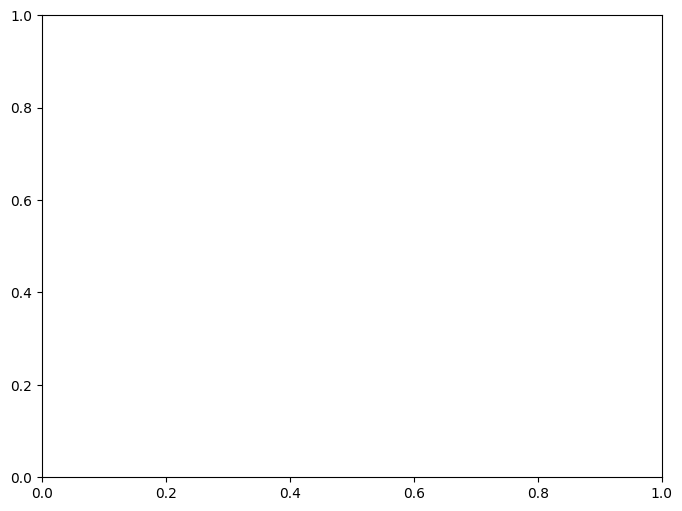

In [ ]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(Alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel('Nombre de coefficients mis à 0')
plt.title("Nombre de coefficients mis à 0 en fonction de la pénalsiation")
plt.axis("tight")
plt.show()



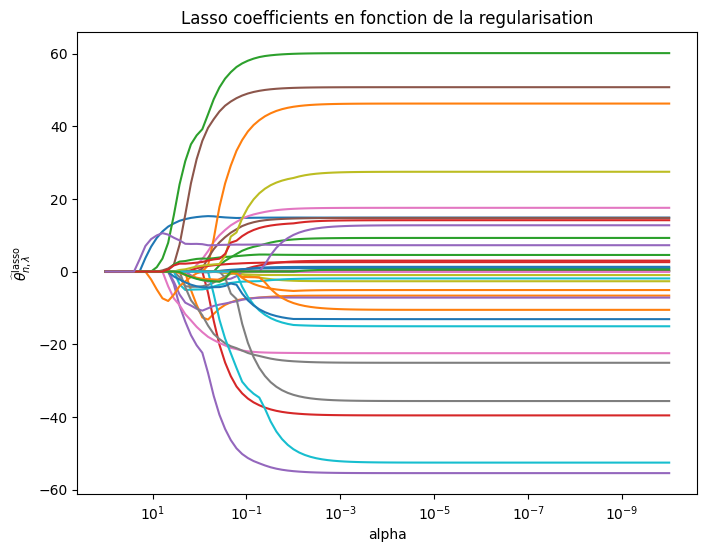

In [ ]:

plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(Alphas, coeff)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients en fonction de la regularisation")
plt.axis("tight")
plt.show()



**Remarque** : Grâce à la pénalisation L1, lasso met à 0 rapidement (selon si alpha est petit) les features jugés peu informatives. C'est ce que nous montre ce graphique ci dessus

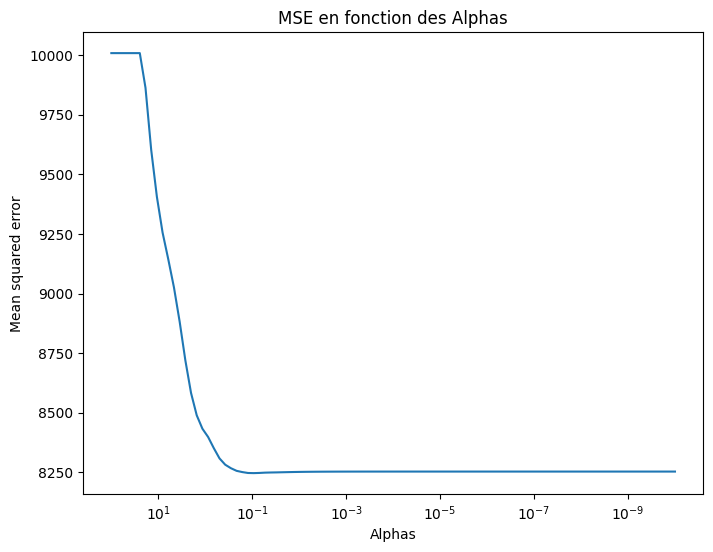

In [ ]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(Alphas, mse_lasso_test)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Alphas")
plt.ylabel('Mean squared error')
plt.title("MSE en fonction des Alphas")
plt.axis("tight")
plt.show()


**Remarque :**  
La courbe ci-dessus montre l'évolution du **(MSE)** sur le jeu de test en fonction du paramètre de régularisation `alpha` utilisé dans la régression Lasso.

On observe que :
- Pour des **valeurs élevées de `alpha`**, la régularisation est trop forte : tous les coefficients sont fortement pénalisés, ce qui conduit à des prédictions très pauvres (MSE élevé).
- Le MSE **diminue rapidement** à mesure que `alpha` diminue, jusqu’à atteindre une **zone plateau autour de `alpha ≈ 10^{-2}`**.
- En dessous d’un certain seuil (`alpha < 10^{-3}`), le MSE reste **quasiment constant**, ce qui indique que la régularisation devient trop faible pour avoir un effet significatif, et le modèle est proche d’une régression linéaire non régularisée.





---




Nous avons observé que le **MSE du modèle Lasso** est relativement **élevé**, et **comparable à celui de la régression Ridge**. Cela suggère que les deux modèles, bien qu’utilisant des régularisations différentes (L1 pour Lasso, L2 pour Ridge), atteignent un **niveau de performance similaire** sur ce jeu de données.

Dès lors, même si le modèle Lasso n’apporte **pas un gain direct en précision**, il présente un **avantage structurel** : il réalise **une sélection automatique de variables**, en annulant certains coefficients dès que la régularisation devient trop forte.

Par conséquent, **nous exploitons le comportement du Lasso non pas pour améliorer la prédiction**, mais pour **identifier les variables les moins informatives**, c’est-à-dire celles qui sont **mises à zéro rapidement** lorsque `alpha` augmente.

Cela nous permet ensuite de :
- Réduire la dimension du jeu de données,
- Faciliter l’interprétation,
- Et entraîner des modèle **sur un sous-ensemble plus pertinent de variables**.

Cette approche transforme le Lasso en **outil d’aide à la sélection de features**, plutôt qu’en solution finale de modélisation.
Toutefois, en elevant les features les plus rapidement mis à 0 par Lasso, on observe pas d'amélioration du MSE voir une dégradation. En appendice, nous metterons les MSE après avoir enlevé des features.

In [ ]:
# on crée une liste de taille (nombre de feature) initialisé à "pas_zero"
first_zero = ["pas_zero"] * X_train.shape[1]

# pour chaque alpha
for i in range(len(Alphas)):
  # pour chaque feature f
    for f in range(X_train.shape[1]):
        if coeff[i][f] == 0 and first_zero[f] == "pas_zero":
            first_zero[f] = Alphas[i]  # Premier alpha où c'est mis à 0

# On trie les features selon cet alpha
# Créer une liste de couples (feature_index, alpha)
sorted_features = sorted([(f, alpha) for f, alpha in enumerate(first_zero) if alpha != "pas_zero"], key=lambda x: x[1])
# on ne garde que les f tel que f est mis à 0
# on trie selon la 2ᵉ valeur du tuple, c’est-à-dire la valeur de alpha.

print("Features mises à 0 le plus tôt :")
for f, alpha in sorted_features:
    print(f"Feature {f} devient 0 à alpha = {alpha:.4f}")


Features mises à 0 le plus tôt :
Feature 26 devient 0 à alpha = 0.0000
Feature 7 devient 0 à alpha = 0.0076
Feature 32 devient 0 à alpha = 0.0100
Feature 24 devient 0 à alpha = 0.0534
Feature 25 devient 0 à alpha = 0.0933
Feature 13 devient 0 à alpha = 0.1630
Feature 8 devient 0 à alpha = 0.2154
Feature 21 devient 0 à alpha = 0.2154
Feature 29 devient 0 à alpha = 0.2154
Feature 20 devient 0 à alpha = 0.2848
Feature 27 devient 0 à alpha = 0.3765
Feature 10 devient 0 à alpha = 0.4977
Feature 18 devient 0 à alpha = 0.4977
Feature 12 devient 0 à alpha = 0.6579
Feature 19 devient 0 à alpha = 0.6579
Feature 3 devient 0 à alpha = 0.8697
Feature 11 devient 0 à alpha = 0.8697
Feature 15 devient 0 à alpha = 1.1498
Feature 6 devient 0 à alpha = 1.5199
Feature 23 devient 0 à alpha = 2.0092
Feature 1 devient 0 à alpha = 2.6561
Feature 17 devient 0 à alpha = 2.6561
Feature 9 devient 0 à alpha = 3.5112
Feature 28 devient 0 à alpha = 3.5112
Feature 31 devient 0 à alpha = 3.5112
Feature 4 devient 0 à a

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

## <font color=darkcyan>  Régression Kernel </font>

La **régression à noyau** peut être particulièrement adaptée dans notre cas, car **elle ne suppose pas que la relation entre les variables explicatives et la cible soit linéaire** dans l’espace original.

L’idée centrale repose sur le fait d'au lieu de travailler dans l’espace initial, on applique implicitement une **transformation des données dans un espace de dimension plus élevée** (souvent infinie), où le problème devient **linéaire**. Cela permet de **capturer des relations complexes et non linéaires** entre les variables, sans avoir à calculer explicitement les coordonnées dans cet espace.

In [ ]:
from sklearn.kernel_ridge import KernelRidge

Dans cette section, nous testons différentes **fonctions noyaux** pour la **régression Ridge à noyau**, dans le but de voir si certaines permettent **d’améliorer la performance du modèle** — en particulier en diminuant le **(MSE)**.

À ce stade, nous **ne cherchons pas encore à optimiser les hyperparamètres** propres aux noyaux (comme le coefficient gamma du noyau RBF ou le degré du noyau polynomial). L’objectif est uniquement de **comparer les effets des différents noyaux** en gardant constant le paramètre de régularisation `alpha`.

Nous utiliserons la même valeur de `alpha` pour tous les noyaux afin d'assurer une **comparaison équitable**. Les noyaux testés incluent :
- **Linéaire** : correspond à une régression Ridge classique,
- **RBF (Radial Basis Function)** : très utilisé pour capturer des relations non linéaires,
- **Polynomial** : introduit des interactions d’ordre supérieur,
- (optionnellement) **Sigmoïde** : parfois utilisé, bien qu’il soit moins courant.

Cela nous permettra de voir **quel type de transformation du feature space** est le plus adapté à notre problème de prédiction de la consommation énergétique.

In [ ]:
#mse = []
krr = KernelRidge(alpha = 1, kernel = 'linear')
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_test)
#mse.append(mean_squared_error(y_pred_krr, y_test))
mean_squared_error(y_pred_krr, y_test)

17344.543342143606

In [ ]:
krr2 = KernelRidge(alpha = 1, kernel = 'rbf')
krr2.fit(X_train, y_train)
y_pred_krr2 = krr2.predict(X_test)
mean_squared_error(y_pred_krr2, y_test)

6422.9903984095345

In [ ]:
krr3 = KernelRidge(alpha = 1, kernel = 'polynomial')
krr3.fit(X_train, y_train)
y_pred_krr3 = krr3.predict(X_test)
mean_squared_error(y_pred_krr3, y_test)

NameError: name 'KernelRidge' is not defined



```
# C'est équivalent à faire ce bloc mais c'est très long à faire tourner
noyaux = ['rbf', 'linear', 'polynomial']
mse = []

krr = KernelRidge(alpha = 1)

for k in noyaux :
    krr.set_params(kernel = k)
    krr.fit(X_train, y_train)
    y_pred_krr =  krr.predict(X_test)
    mse.append(mean_squared_error(y_pred_krr, y_test))
```




D'après les premiers tests, le noyau **RBF (Radial Basis Function)** semble être **le plus performant parmi les noyaux testés**, bien qu'il ne réduise pas encore drastiquement le MSE par rapport aux méthodes précédentes.

Dans cette section, nous allons explorer **l’impact des hyperparamètres** du noyau RBF, notamment :
- `alpha` : le paramètre de régularisation,
- `gamma` : qui contrôle la largeur du noyau RBF (et donc la complexité de la transformation non linéaire).

Nous utiliserons une **recherche sur grille (`GridSearchCV`)** pour sélectionner automatiquement **la meilleure combinaison de `alpha` et `gamma`**, en nous basant sur la **minimisation du MSE**.

L’objectif est de déterminer si un **réglage fin des hyperparamètres** permet de **significativement améliorer les performances du modèle Kernel Ridge**, et ainsi capturer des relations non linéaires complexes dans nos données.

Cela nous permettra également de mieux évaluer **le potentiel réel du noyau RBF** sur notre problème de régression énergétique.


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# on definit le modele
model = KernelRidge(kernel='rbf', gamma=0.1)

# on definit la grile de recherche (plage des hyperparamete à tester)
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3]}
            #"gamma": np.logspace(-2, 2, 5)}
            # espace de reccherche pour gamma (rbf) et alpha

# il teste tous les couple (alpha_i, gamma_i)
gs_krr = GridSearchCV(model, cv = 5, param_grid = param_grid, n_jobs= -1)
# kfold = 5
gs_krr.fit(X_train, y_train)
print("meilleur hyperparamètre ",gs_krr.best_params_, "\n")
print("Cross validation score ", gs_krr.best_score_)
#Mean cross-validated score of the best_estimator

meilleur hyperparamètre  {'alpha': 0.1} 

Cross validation score  0.4099262743724035


In [ ]:
# on definit le modele (long à faire tourner)
model = KernelRidge(kernel='rbf', gamma=0.1)

# on definit la grile de recherche (plage des hyperparamete à tester)
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
            "gamma": np.logspace(-2, 2, 4)}
            # espace de reccherche pour gamma (rbf) et alpha

# il teste tous les couple (alpha_i, gamma_j)
gs_krr = GridSearchCV(model, cv = 5, param_grid = param_grid, n_jobs= -1)
# kfold = 5
gs_krr.fit(X_train, y_train)
print("meilleur hyperparamètre ",gs_krr.best_params_, "\n")
print("Cross validation score ", gs_krr.best_score_)
#Mean cross-validated score of the best_estimator

KeyboardInterrupt: 

In [ ]:
krr2 = KernelRidge(alpha = 0.1, kernel = 'rbf')
krr2.fit(X_train, y_train)
y_pred_krr2 = krr2.predict(X_test)
mean_squared_error(y_pred_krr2, y_test)

5650.6196408075875

In [ ]:
# couple optimal par GridSearch (alpha, gamma) = (0.001, 0.01)
krr2 = KernelRidge(kernel = 'rbf', alpha = 0.001, gamma = 0.01)
krr2.fit(X_train, y_train)
y_pred_krr2 = krr2.predict(X_test)
mean_squared_error(y_pred_krr2, y_test)

5225.674147054168

rq : rajouter critere variance sur validation croisée

Grâce à l’optimisation conjointe des hyperparamètres `alpha` et `gamma` via **`GridSearchCV`**, nous avons pu faire descendre le **MSE jusqu’à environ 5225**, ce qui représente une amélioration notable par rapport aux modèles précédents.

Cependant, malgré cette baisse du MSE, les résultats obtenus restent **modestes** compte tenu de la complexité du problème. Cela suggère que, même avec une transformation non linéaire du feature space, **le modèle à noyau atteint ses limites** pour capturer les variations fines de la consommation énergétique.

---

### Prochaine étape : réseaux de neurones

Pour aller plus loin, nous allons explorer l’utilisation d’un **réseau de neurones dense**, capable d’**apprendre des représentations complexes** à partir des données. Ce type de modèle est particulièrement bien adapté aux problèmes où :
- les relations entre les variables sont **fortement non linéaires**,
- il existe des **interactions croisées complexes** entre les features,

Cela pourrait être une bonne idée de tester les RNNs qui permetent de capturer les relation avec des séries temporelles

## <font color=darkcyan>  Reseau de neurones denses (MLP) </font>

On va implémenter un réseau de neurones dense à L couche. Voici son architecture :


\begin{align*}
h_{\theta}^0(x) &= x\,,\\
\mathrm{transformation\; linéaire}\qquad z_{\theta}^k(x)  &= b^k + W^kh_{\theta}^{k-1}(x)\quad \mathrm{pour\;tout\;} 1\leqslant k\leqslant L\,,\\
\mathrm{transformation\; non linéaire}\qquad h_{\theta}^k(x)  &= \varphi_k(z_{\theta}^{k}(x))\quad \mathrm{pour\;tout\;}1\leqslant k\leqslant L\,,
\end{align*}

ou pour tout $1 \leqslant k \leqslant L$, $b^k\in\mathbb{R}^{d_k}$, $W^k\in\mathbb{R}^{d_k\times d_{k-1}}$, avec $d_0 \equiv d$, et $\varphi^k: \mathbb{R}^{d_k} \to \mathbb{R}^{d_k}$ est une fonction d'activation (non linéaire) et $x\in\mathbb{R}^d$ l'entrée du réseau.

Soit **$\theta = \{b^1,W^1,\ldots,b^L,W^L\}$ les paramètres inconnues à régler et $f_{\theta}(x) = h_{\theta}^L(x)$** la sortie du réseau

Dans notre cas, il s'agit d'une régression et la dernière fonction d'activation sera donc une transformation linéaire

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
(X_train.shape, y_train.shape)

((15788, 35), (15788,))

Voici l'architecture de notre réseau de neurone dense.

| Couche         | Nombre de neurones | Activation | Commentaire                   |
|----------------|--------------------|------------|-------------------------------|
| Entrée         | 35                 | ReLU       | Dimension des features        |
| Cachée   1      | 20                 | ReLU       | Couche dense
| Cachée    2     | 20                 | ReLU       | Couche dense + Dropout (0.3)  |
| Sortie         | 1                  | Linéaire   | Prédiction d'une variable réelle |

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,421 (9.46 KB)

 Trainable params: 2,421 (9.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11489.4736
Epoch 2/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 8992.6357
Epoch 3/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 8826.2842
Epoch 4/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 8647.4346
Epoch 5/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8733.1982
Epoch 6/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8455.5371
Epoch 7/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8385.1807
Epoch 8/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 8322.3057
Epoch 9/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8133.8203
Epoch 10/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8345.8008
Epoch 11/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7953.1831
Epoch 12/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8263.9492
Epoch 13/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8097.7334
Epoch 14/15
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/st

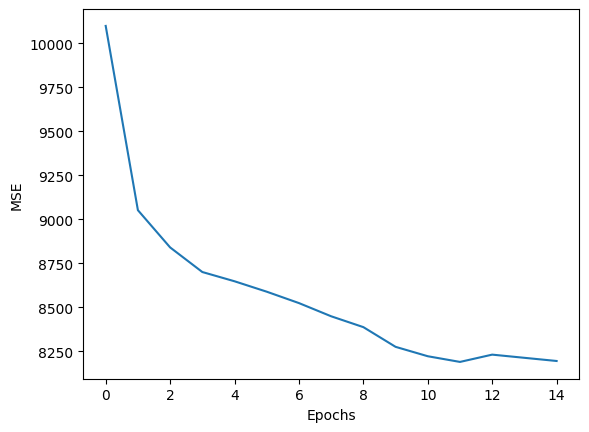

In [ ]:
input_d = 35    #nombre de features
hidden_d = 20   #nombre de neurone des couches -

model_mse = Sequential()
# crée un modèle séquentiel, c'est-à-dire une pile de couches où chaque couche est connectée à la suivante.
# couche d'entrée X avec 35 neurones d'entrée
model_mse.add(Dense(input_d, input_shape=(input_d,), activation='relu'))
model_mse.add(Dropout(0.3))  # Dropout à 30% -> voir remarque en dessous pour explication
# hidden layer avec 15 neurones
model_mse.add(Dense(hidden_d, activation='relu'))
model_mse.add(Dense(hidden_d, activation='relu'))
#model.add(Dense(hidden_d, activation='linear'))
# couche de sortie Y avec activation linéaire car cadre de regression
model_mse.add(Dense(1, activation = 'linear'))

model_mse.compile(loss='mean_squared_error', optimizer='adam')
# configure le modèle de réseau de neurones en spécifiant la loss et l'algo de'opti
# loss -> sum((yi - ŷi)²) pb de regression
model_mse.summary()

# Fit the model
history_mse = model_mse.fit(X_train, y_train, epochs=15, batch_size=5, verbose=1, shuffle=True)
# entraîne le modèle sur les données d'entraînement X_train et y_train
# epochs = 5 : Nombre de fois que le modèle va voir l’ensemble des données.
# batch_size = 5 : Le modèle met à jour ses poids après avoir vu 5 échantillons à la fois.
# verobose = 1 : Affiche les informations d'entraînement (0 = silencieux, 1 = détails, 2 = barre de progression).
# shuffle = true : Mélange les données à chaque époque pour éviter un apprentissage biaisé.

# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history_mse.history["loss"]);
#Keras renvoie un objet history, qui contient l’évolution de la perte

Le paramètre `epochs` correspond au **nombre de fois que le réseau passe entièrement sur le jeu d'entraînement**.
- **Trop peu d'epochs** : le modèle n’a pas le temps d’apprendre, il **sous-apprend** (underfitting).
- **Trop d'epochs** : le modèle risque de **mémoriser les données d’entraînement**, ce qui conduit à du **sur-apprentissage** (overfitting), c’est-à-dire de mauvaises performances sur les données de test.

L’idée est de **trouver un compromis** permettant un **bon apprentissage sans sur-ajustement**, et cela peut être exploré empiriquement.

---

Nous ajoutons également une couche de **Dropout**, une technique de régularisation pour les réseaux de neurones.  
Le principe : **supprimer aléatoirement certains neurones** pendant l'entraînement.

Cela permet :
- d’éviter que le réseau **dépende trop fortement de certains chemins d’activation**,
- de **forcer le réseau à apprendre des représentations plus robustes**,
- et donc, in fine, **d’améliorer la capacité de généralisation** du modèle.

In [ ]:
# prediction sur jeu d'apprentissage

y_pred_train_mse = model_mse.predict(X_train).squeeze()


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


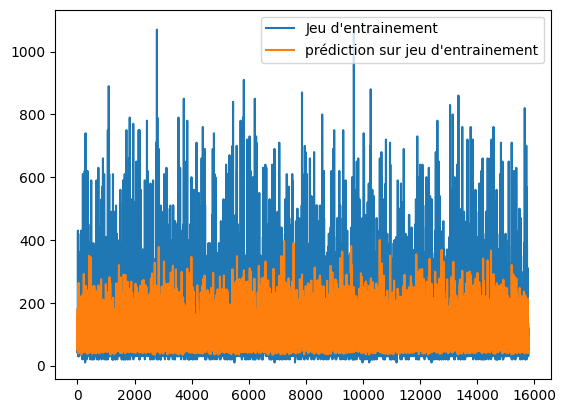

In [ ]:
plt.plot(y_train.values, label = "Jeu d'entrainement")
plt.plot(y_pred_train_mse,label = "prédiction sur jeu d'entrainement")
plt.legend()

In [ ]:
# prediction sur jeu de test
y_pred_test_mse = model_mse.predict(X_test).squeeze()

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


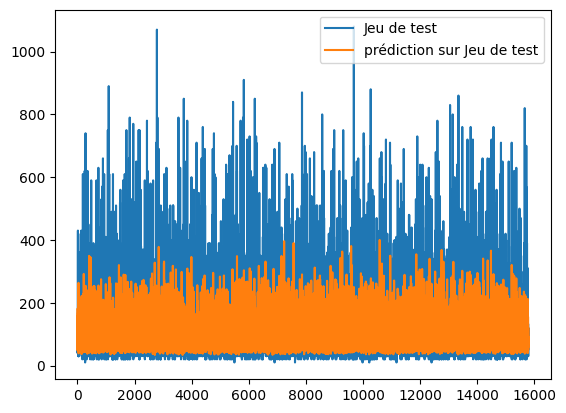

In [ ]:
# prediction sur jeu de test
plt.plot(y_train.values, label = "Jeu de test")
plt.plot(y_pred_train_mse,label = "prédiction sur Jeu de test")
plt.legend()

In [ ]:
# Evaluation du modele sur jeu de test
print("Evaluation")
results = model_mse.evaluate(X_test, y_test, batch_size=128)
print("test loss ", results)

Evaluation
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6709.3809  
test loss  7685.68212890625


L’**Early Stopping** est une technique de régularisation utilisée pour **éviter le sur-apprentissage** (*overfitting*) lors de l'entraînement d’un modèle de machine learning, notamment les réseaux de neurones.

Le principe est le suivant
> **Arrêter automatiquement l'entraînement** dès que la performance du modèle **cesse de s'améliorer** (souvent mesurée via la perte sur un jeu de validation).
Cela nous permet de pas prendre un nombre d'epoch aleatorie. Voyons voir si cette technique améliore nos resultats

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
input_d = 35    #nombre de features
hidden_d = 20   #nombre de neurone des couches -

model_mse = Sequential()
# crée un modèle séquentiel, c'est-à-dire une pile de couches où chaque couche est connectée à la suivante.
# couche d'entrée X avec 35 neurones d'entrée
model_mse.add(Dense(input_d, input_shape=(input_d,), activation='relu'))
model_mse.add(Dropout(0.3))  # Dropout à 30% -> voir remarque en dessous pour explication
# hidden layer avec 15 neurones
model_mse.add(Dense(hidden_d, activation='relu'))
#model.add(Dense(hidden_d, activation='linear'))
# couche de sortie Y avec activation linéaire car cadre de regression
model_mse.add(Dense(1, activation = 'linear'))

model_mse.compile(loss='mean_squared_error', optimizer='adam')
# configure le modèle de réseau de neurones en spécifiant la loss et l'algo de'opti
# loss -> sum((yi - ŷi)²) pb de regression
model_mse.summary()

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history_mse = model_mse.fit(
    X_train, y_train,
    epochs=50,
    batch_size=5,
    verbose=1,
    shuffle=True,
    callbacks=[early_stop]
)

# entraîne le modèle sur les données d'entraînement X_train et y_train
# epochs = 5 : Nombre de fois que le modèle va voir l’ensemble des données.
# batch_size = 5 : Le modèle met à jour ses poids après avoir vu 5 échantillons à la fois.
# verobose = 1 : Affiche les informations d'entraînement (0 = silencieux, 1 = détails, 2 = barre de progression).
# shuffle = true : Mélange les données à chaque époque pour éviter un apprentissage biaisé.

# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history_mse.history["loss"]);
#Keras renvoie un objet history, qui contient l’évolution de la perte

In [ ]:
# Evaluation du modele sur jeu de teste
print("Evaluation")
results_mse_mse = model_mse.evaluate(X_test, y_test, batch_size=128)
print("test loss ", results_mse_mse)

Evaluation


NameError: name 'model_mse' is not defined

**Remarque** :
  * L'ajout de Early stopping diminue légérement notre evaluation du MSE sur le test
  * L'ajout de couche dans notre architecture n'ameliore pas les prédiction sur le jeu de test.

Lors de l'analyse descriptive, les **boîtes à moustaches** ont révélé la présence de **valeurs aberrantes (outliers)** dans notre variable cible : la consommation d'énergie.

Cependant, la **Mean Squared Error (MSE)**, utilisée jusqu'à présent comme fonction de perte, **n'est pas robuste** aux outliers : elle **accentue fortement l'impact des grandes erreurs** en les élevant au carré. Cela peut conduire le modèle à **sur-ajuster ces points extrêmes**, au détriment de la performance globale.

Pour pallier ce problème, nous proposons d’utiliser la **Huber Loss**, une fonction de perte **hybride** entre MSE et MAE (Mean Absolute Error).

---

### Définition mathématique

La **Huber Loss** de paramètre \( \delta > 0 \) est définie comme suit :

\
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\\\
\delta \cdot \left(|y - \hat{y}| - \frac{1}{2} \delta\right) & \text{sinon}
\end{cases}

\

- Lorsque les erreurs sont **modérées**, la Huber Loss se comporte comme la **MSE**, permettant un apprentissage précis.
- Lorsque les erreurs sont **grandes** (outliers), elle adopte un comportement **linéaire** similaire à la **MAE** (ecart en valeur absolue), ce qui permet d’**atténuer l'influence des valeurs extrêmes** sur la mise à jour des poids.

---

### Objectif

En remplaçant la MSE par la **Huber Loss**, nous cherchons à :
- **Améliorer la robustesse du modèle** vis-à-vis des pics de consommation,
- Réduire l'effet de sur-ajustement aux valeurs aberrantes,
- Et améliorer la **généralisation globale** du réseau.

Nous allons donc réentraîner le MLP avec cette nouvelle fonction de perte, et comparer les performances obtenues avec celles de la MSE

Epoch 1/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 60.9533
Epoch 2/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 45.7142
Epoch 3/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 43.7834
Epoch 4/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 43.6114
Epoch 5/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 43.5042
Epoch 6/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 42.5951
Epoch 7/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 42.6720
Epoch 8/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 43.5084
Epoch 9/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 42.4077
Epoch 10/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 43.2950
Epoch 11/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 41.8894
Epoch 12/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 43.3085
Epoch 13/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 42.9639
Epoch 14/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 41.9793
Epoch 15/5

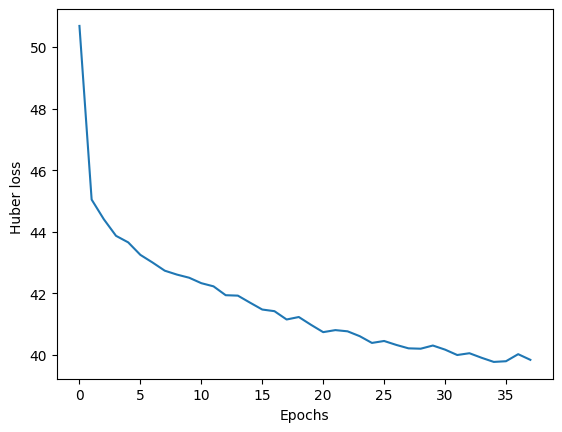

In [ ]:
input_d = 35    #nombre de features
hidden_d = 20   #nombre de neurone des couches -

model_huber = Sequential()
# crée un modèle séquentiel, c'est-à-dire une pile de couches où chaque couche est connectée à la suivante.
# couche d'entrée X avec 35 neurones d'entrée
model_huber.add(Dense(input_d, input_shape=(input_d,), activation='relu'))
model_huber.add(Dropout(0.3))  # Dropout à 30% -> voir remarque en dessous pour explication
# hidden layer avec 15 neurones
model_huber.add(Dense(hidden_d, activation='relu'))

# couche de sortie Y avec activation linéaire car cadre de regression
model_huber.add(Dense(1, activation = 'linear'))

model_huber.compile(loss='huber', optimizer='adam')

early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
# Fit the model
history_huber = model_huber.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1, shuffle=True, callbacks=[early_stop] )
# entraîne le modèle sur les données d'entraînement X_train et y_train
# epochs = 5 : Nombre de fois que le modèle va voir l’ensemble des données.
# batch_size = 5 : Le modèle met à jour ses poids après avoir vu 5 échantillons à la fois.
# verobose = 1 : Affiche les informations d'entraînement (0 = silencieux, 1 = détails, 2 = barre de progression).
# shuffle = true : Mélange les données à chaque époque pour éviter un apprentissage biaisé.

# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("Huber loss ")
plt.plot(history_huber.history["loss"]);
#Keras renvoie un objet history, qui contient l’évolution de la perte

In [ ]:
# prediction sur jeu de test
y_pred_test_huber = model_huber.predict(X_test).squeeze()

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


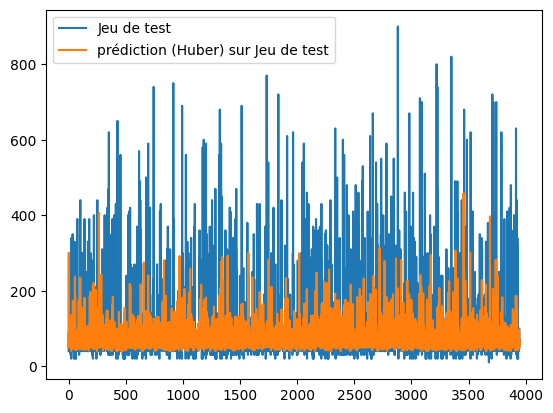

In [ ]:
# prediction sur jeu de test
plt.plot(y_test.values, label = "Jeu de test")
plt.plot(y_pred_test_huber,label = "prédiction (Huber) sur Jeu de test")
plt.legend()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_huber.evaluate(X_test, y_test, batch_size=128)
print("test loss", results)

Evaluate on test data
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.5550 
test loss 38.83610534667969


⚠ erreur que j'ai faite au début : Une Huber loss autour de **50** peut sembler rassurante car elle indique que la majorité des prédictions sont **proches des vraies valeurs**.

Mais j'ai interpêté **la Huber loss comme une MSE** ce qui n'est pas correct.
- Pour les **petites erreurs**, la Huber loss se comporte comme une **MSE** (erreur quadratique).
- Pour les **grandes erreurs** (outliers), elle agit comme une **MAE** (erreur absolue), donc **moins sévère** que la MSE.

Au final elle donne souvent une **valeur moyenne plus faible** que la MSE, car elle **atténue l'impact des outliers**.

> Une **Huber loss faible** indique de bonnes prédictions sur la majorité des données,  
> mais elle **cache les erreurs extrêmes**, contrairement à la MSE qui les pénalise fortement.


In [ ]:
# Prédictions sur le jeu de test
y_pred_huber = model_huber.predict(X_test)

# Calcul de la MSE (Mean Squared Error)
result_mse_huber = mean_squared_error(y_test, y_pred_huber)

print("MSE du modèle entraîné avec Huber loss :", result_mse_huber)
print("MSE du modèle entrainé avec MSE loss ", results_mse_mse)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE du modèle entraîné avec Huber loss : 8386.9912109375
MSE du modèle entrainé avec MSE loss  7459.05078125


**Interprêtation**

- Le modèle entraîné avec **MSE** obtient un meilleur score de MSE final (7459.05) que celui entraîné avec Huber.
- Toutefois, cela ne signifie pas nécessairement qu'il est "meilleur" :
  - Le modèle Huber a été **optimisé pour une fonction de perte robuste**, ce qui le rend **moins sensible aux valeurs aberrantes**.
  - Il **sacrifie légèrement la performance en MSE** pour obtenir des prédictions plus stables.

**En conclusion**:

- Si l’objectif est de **minimiser strictement la MSE**, alors le modèle entraîné avec la MSE reste le meilleur choix.
- En revanche, si l’on souhaite un modèle **plus robuste aux outliers** ou une **meilleure généralisation sur des données bruitées**, la **Huber Loss** reste une alternative pertinente.


##  <font color=red>  Conclusion générale temporelles </font>

Dans ce projet, nous avons étudié un problème de **régression** portant sur la **prédiction de la consommation énergétique d'une maison** à partir de données environnementales et temporelles. L'objectif principal était de construire un modèle capable de **prédire la consommation des appareils électroménagers**, mesurée toutes les 10 minutes sur plusieurs mois.

---

Nous avons débuté par une **analyse descriptive complète** :
- Mise en évidence de **patterns temporels** (week-end, heure de la journée),
- Identification de **valeurs aberrantes (outliers)** à travers des boîtes à moustaches,
- Ajout de **variables temporelles dérivées** (jour de la semaine, week-end, NSM) pour enrichir l’information.

---

### Méthodes testées

Nous avons ensuite évalué plusieurs modèles de régression :
- **Régression Ridge** et **Lasso** : simples mais efficaces, surtout après standardisation,
- **Kernel Ridge** : non-linéaire, testé avec différents noyaux, mais performances limitées,
- **MLP (réseau de neurones)** : architecture dense avec Dropout et EarlyStopping.

Chaque modèle a été comparé selon des **métriques communes** : MSE, comportement visuel des prédictions...

---

###  Impact des fonctions de perte

Nous avons montré que :
- La **MSE** est efficace globalement mais très sensible aux outliers,
- La **Huber Loss** apporte plus de **robustesse** et produit des **prédictions plus stables**, même si la MSE finale est légèrement plus élevée.

---

###  Bilan

| Modèle                     | MSE sur test |
|----------------------------|--------------|
| **Régression Ridge**       | ~8252        |
| **Régression Lasso**       | ~8638        |
| **MLP (MSE)**              | ~7459        |
| **MLP (Huber)**            | ~8387        |
| **Kernel Ridge (RBF)**     | ~5226    |

Le **modèle Kernel Ridge avec noyau RBF**, couplé à une bonne sélection des hyperparamètres, offre les **meilleurs résultats de prédiction** pour ce jeu de données. Il capture les **relations non linéaires** entre les variables, sans nécessiter d’architecture trop complexe.

---


## <font color=red>  Hors cadre du cours  </font>


**Ouverture pour la suite** : Il pourrait être interessant de tester :
  * RNNs (réseau de neurones pour série temporelles)
  * Optuna (équivalent à GridSearch pour les réseau de neurones)
  * Boruta / rf pour la sélection de features


### Ajout de couche pour améliorer la prédiction

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,841 (11.10 KB)

 Trainable params: 2,841 (11.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 11662.5166
Epoch 2/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 9152.8682
Epoch 3/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9051.4697
Epoch 4/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8935.0107
Epoch 5/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 8438.0439
Epoch 6/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8331.9150
Epoch 7/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 8400.6592
Epoch 8/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 7964.7915
Epoch 9/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8462.5254
Epoch 10/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8443.7451
Epoch 11/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 7673.1489
Epoch 12/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 8224.2490
Epoch 13/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8350.6963
Epoch 14/50
3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/st

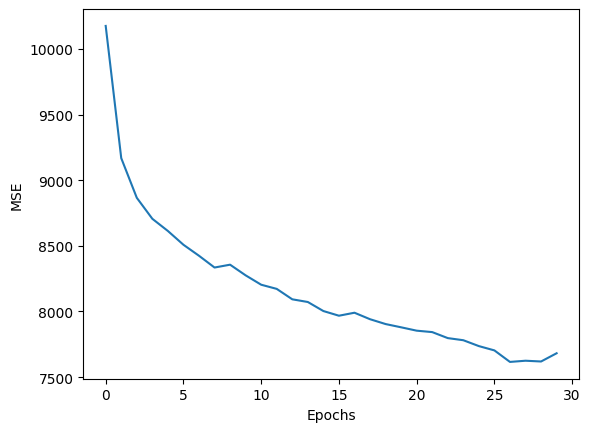

In [ ]:
input_d = 35    #nombre de features
hidden_d = 20   #nombre de neurone des couches -

model_mse = Sequential()
# crée un modèle séquentiel, c'est-à-dire une pile de couches où chaque couche est connectée à la suivante.
# couche d'entrée X avec 35 neurones d'entrée
model_mse.add(Dense(input_d, input_shape=(input_d,), activation='relu'))
model_mse.add(Dropout(0.3))  # Dropout à 30% -> voir remarque en dessous pour explication
# hidden layer avec 15 neurones
model_mse.add(Dense(hidden_d, activation='relu'))
model_mse.add(Dense(hidden_d, activation='relu'))
model_mse.add(Dense(hidden_d, activation='relu'))
#model.add(Dense(hidden_d, activation='linear'))
# couche de sortie Y avec activation linéaire car cadre de regression
model_mse.add(Dense(1, activation = 'linear'))

model_mse.compile(loss='mean_squared_error', optimizer='adam')
# configure le modèle de réseau de neurones en spécifiant la loss et l'algo de'opti
# loss -> sum((yi - ŷi)²) pb de regression
model_mse.summary()

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history_mse = model_mse.fit(
    X_train, y_train,
    epochs=50,
    batch_size=5,
    verbose=1,
    shuffle=True,
    callbacks=[early_stop]
)

# entraîne le modèle sur les données d'entraînement X_train et y_train
# epochs = 5 : Nombre de fois que le modèle va voir l’ensemble des données.
# batch_size = 5 : Le modèle met à jour ses poids après avoir vu 5 échantillons à la fois.
# verobose = 1 : Affiche les informations d'entraînement (0 = silencieux, 1 = détails, 2 = barre de progression).
# shuffle = true : Mélange les données à chaque époque pour éviter un apprentissage biaisé.

# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history_mse.history["loss"]);
#Keras renvoie un objet history, qui contient l’évolution de la perte

In [ ]:
# Evaluation du modele sur jeu de teste
print("Evaluation")
results = model_mse.evaluate(X_test, y_test, batch_size=128)
print("test loss ", results)

Evaluation
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6517.6177 
test loss  7459.05078125


# Table des matières
- [1. Introduction](#1-Introduction)
- [2. Méthodologie](#2-Méthodologie)
- [3. Résultats](#3-Résultats)
- [4. Conclusion](#4-Conclusion)

# 1. Introduction
...

# 2. Méthodologie
...

# 3. Résultats
...

# 4. Conclusion
...
